In [22]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Two Levels and 3 Factors: Full Factorial: Wastewater Example

number of factors =3, each at 2 levels

total experiments for full factorial = 2^ 3 = 8 experiments

Experimental order to standard order.

In [62]:
C_ww=pd.Series([-1,1,-1,1,-1,+1,-1,+1],name='Chemical')
T_ww=pd.Series([-1,-1,1,1,-1,-1,1,1], name='Temp')
S_ww=pd.Series([-1,-1,-1,-1,1,1,1,1],name='Stirring')
O_ww=pd.Series([5,30,6,33,4,3,5,4],name='Outcome')

In [63]:
DF_ww=pd.concat([C_ww,T_ww,S_ww,O_ww],axis='columns')
print(DF_ww)

   Chemical  Temp  Stirring  Outcome
0        -1    -1        -1        5
1         1    -1        -1       30
2        -1     1        -1        6
3         1     1        -1       33
4        -1    -1         1        4
5         1    -1         1        3
6        -1     1         1        5
7         1     1         1        4


In [64]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_ww=ols('O_ww~C_ww*T_ww*S_ww',data=DF_ww)
results_ww=model_ww.fit()
print(results_ww.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: O_ww             AIC:                -482.1177
Date:               2022-11-24 15:29 BIC:                -481.4822
No. Observations:   8                Log-Likelihood:     249.06   
Df Model:           7                F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
-------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|  [0.025  0.975]
-------------------------------------------------------------------
Intercept         11.2500       inf   0.0000    nan     nan     nan
C_ww               6.2500       inf   0.0000    nan     nan     nan
T_ww               0.7500       inf   0.0000    nan     nan     nan
C_ww:T_ww          0.2500       inf   0.0000    nan     nan     nan
S_ww  

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


In [65]:
model_ww.exog_names[1:]

['C_ww',
 'T_ww',
 'C_ww:T_ww',
 'S_ww',
 'C_ww:S_ww',
 'T_ww:S_ww',
 'C_ww:T_ww:S_ww']

# Four Factors at 2 Levels

ce=collection efficiency model

outcome of delivery effeciency:  ed=energy delivery model

Four factors:  
• A: total amount of sunlight received  
• B: capacity of the storage tank  
• C: water flow rate through the absorber  
• D: intermittency of the sunlight  

2^4 = 16 experiments

Build an old model for full factorial.

In [27]:
A=pd.Series([-1,1,-1,1,-1,+1,-1,+1,-1,1,-1,1,-1,+1,-1,+1],name="A")
B=pd.Series([-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1],name="B")
C=pd.Series([-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1],name="C")
D=pd.Series([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],name="D")
y=pd.Series([82,83.7,61.7,100,82.1,84.1,67.7,100,82,86.3,66,100,82.2,89.8,68.6,100],name="y")

In [28]:
DF_ed=pd.concat([A,B,C,D,y],axis='columns')
print(DF_ed)

    A  B  C  D      y
0  -1 -1 -1 -1   82.0
1   1 -1 -1 -1   83.7
2  -1  1 -1 -1   61.7
3   1  1 -1 -1  100.0
4  -1 -1  1 -1   82.1
5   1 -1  1 -1   84.1
6  -1  1  1 -1   67.7
7   1  1  1 -1  100.0
8  -1 -1 -1  1   82.0
9   1 -1 -1  1   86.3
10 -1  1 -1  1   66.0
11  1  1 -1  1  100.0
12 -1 -1  1  1   82.2
13  1 -1  1  1   89.8
14 -1  1  1  1   68.6
15  1  1  1  1  100.0


In [29]:
model_ed=ols('y~A*B*C*D',data=DF_ed)
results_ed=model_ed.fit()
print(results_ed.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: y                AIC:                -907.3939
Date:               2022-11-24 14:07 BIC:                -895.0325
No. Observations:   16               Log-Likelihood:     469.70   
Df Model:           15               F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept     83.5125        inf    0.0000     nan      nan      nan
A              9.4750        inf    0.0000     nan      nan      nan
B             -0.5125        inf   -0.0000     nan      nan      nan
A:B            7.5250        inf    0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constan

In [30]:
intercept = np.mean(y)
intercept

83.51249999999999

Interpret the coefficients.

Intercept term is the expected efficiency at the baseline conditions = average of all experimental values 

Coefficient A is the effect of increasng sunlight from 0 to 1 (by 1 unit) on efficiency, taking other factors into account.  

The 2-way interaction between A and B is A:B  
The 3-way interaction between A and B and C is A:B:C

Looking at the magnitude of effects, it appears that A is important.  The other main effects are much less compared to factor A. The effect of the A* B interaction is large.  You always include the main effects of the interaction you include in the model.  So let's move forward with the factors of A and B to a new model.  

# Re-fitting and gaining DF for standard error estimates

In [31]:
model_ed_AB=ols('y~A*B',data=DF_ed)
results_ed_AB=model_ed_AB.fit()
print(results_ed_AB.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.973   
Dependent Variable: y                AIC:                72.1394 
Date:               2022-11-24 14:08 BIC:                75.2298 
No. Observations:   16               Log-Likelihood:     -32.070 
Df Model:           3                F-statistic:        181.9   
Df Residuals:       12               Prob (F-statistic): 2.88e-10
R-squared:          0.978            Scale:              4.2996  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    83.5125    0.5184  161.1010  0.0000  82.3830  84.6420
A             9.4750    0.5184   18.2779  0.0000   8.3455  10.6045
B            -0.5125    0.5184   -0.9886  0.3424  -1.6420   0.6170
A:B           7.5250    0.5184   14.5162  0.0000   6.3955   8.6545
--------------------

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The effects are the same, but now we have extra df to be able to calculate standard errors and make hypothesis tests.  We still have 16 experimental values and are estimating 4 coefficients.  

The standard error of the regresssion is the sqrt of the MSE=scale = 2.074

Std. error of the coefficients are all standard error of the regression / sqrt n = 2.074 / sqrt(16) = 0.5184

The effect of A and of the AB interaction are large compared to the std error adn are significant. 

In [32]:
DF_ed1=pd.concat([A,B,y],axis='columns')
print(DF_ed1)

    A  B      y
0  -1 -1   82.0
1   1 -1   83.7
2  -1  1   61.7
3   1  1  100.0
4  -1 -1   82.1
5   1 -1   84.1
6  -1  1   67.7
7   1  1  100.0
8  -1 -1   82.0
9   1 -1   86.3
10 -1  1   66.0
11  1  1  100.0
12 -1 -1   82.2
13  1 -1   89.8
14 -1  1   68.6
15  1  1  100.0


In [33]:
results_ed_AB.predict()

array([ 82.075,  85.975,  66.   , 100.   ,  82.075,  85.975,  66.   ,
       100.   ,  82.075,  85.975,  66.   , 100.   ,  82.075,  85.975,
        66.   , 100.   ])

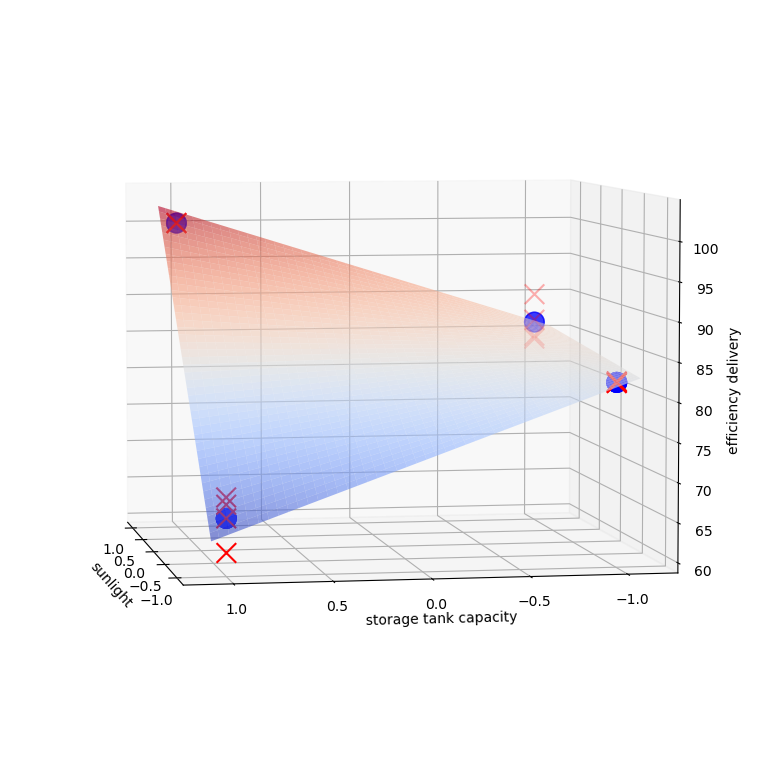

In [34]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DF_ed1
x = df['A']
y= df['B']
z = df['y']

x1,x2,x3=model_ed_AB.exog_names[1:]

x_surf=np.arange(-1.1,1.1,0.01)
y_surf=np.arange(-1.1,1.1,0.01)
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_ed_AB.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.6,cmap='coolwarm')

ax.scatter(x,y,z,marker='x',color='r',s=200,label="Raw Data")
ax.view_init(elev=5,azim=170)

ax.set_xlabel("sunlight")
ax.set_ylabel("storage tank capacity")
ax.set_zlabel("efficiency delivery")
             
ax.scatter(x.values,y.values,results_ed_AB.fittedvalues.values,s=200,color='blue',label="Fited Values")

# Half Fractions: doing half the work with a tradeoff

cell-culture bioreactor and we want to minimize waste prodcution

T = temperature  
O = Oxygen
P = pH

There are 3 factors here each at 2 levels.  You would want to do 2^3 = 8 experiments to find all of the coefficients.  What if you wanted to or needed to only do 4 experiments?

Do a half-fractional design of experiment.  

T + = high temp;  R - = low temp 
O + = high oxygen; F - = low oxygen 
P + high pH; P - low pH

In [19]:
T=pd.Series([-1,1,-1,1],name="Temp")
O=pd.Series([-1,-1,1,1],name="Oxygen")
P=pd.Series([1,-1,-1,1],name="pH")
W=pd.Series([30,6,4,4],name="Waste")

In [20]:
DF_Waste=pd.concat([T,O,P,W],axis='columns')
print(DF_Waste)

   Temp  Oxygen  pH  Waste
0    -1      -1   1     30
1     1      -1  -1      6
2    -1       1  -1      4
3     1       1   1      4


In [21]:
model_Waste=ols('Waste~T+O+P',data=DF_Waste)
results_Waste=model_Waste.fit()
print(results_Waste.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: Waste            AIC:                -247.2108
Date:               2022-11-24 12:54 BIC:                -249.6656
No. Observations:   4                Log-Likelihood:     127.61   
Df Model:           3                F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept     11.0000        inf    0.0000     nan      nan      nan
T             -6.0000        inf   -0.0000     nan      nan      nan
O             -7.0000        inf   -0.0000     nan      nan      nan
P              6.0000        inf    0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(

What is the confounding pattern for the half-fraction?  P = T * O

2 ^ 3-1; III design = half fraction

The worst confounding in this design is between main effects and the two- factor interactions.   
❑ This is the resolution of the design: a Resolution III design  
❑ Shows the level of confounding   
❑ Shows how clearly the effects are separated  

the model is:  waste = 11 + 6XTemp - 6XOxygen - 7XpH

❑ Confounding pattern:  T → T + OP 

                        O → O + TP

                       P → P + TO

                       Intercept → I + TOP
                       
❑ What does the confounding pattern tell us?  
We will never be able to tell A apart from the BC interaction    
We say:  
o A is another name for BC  
o B is an alias for AC  
o C is an alias for AB  
o Design was generated by C = AB

How would you minimize Waste?

A disturbance is uncontrollable and unmeasured = randomize!

An example of a disturbance?

covariates:  not controllable but can be measured

Examples of a covariant?